#### Introduction to Feature Engineering
###### In this, we will discuss more on the how to identify initial features of the dataset and formulate Mutual information score with some plots

In [2]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

plt.style.use('dark_background')
plt.rc("figure",autolayout=True)
plt.rc(
 "axes",
labelweight="bold",
labelsize="large",
titleweight="bold",
titlesize = 14,
titlepad = 10,
)

### Loading the data [For this tutorial, I'm using Ames dataset found here - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data]

In [23]:
df = pd.read_csv("ames.csv")

In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900


### We are using mutual_info_regression from Sklearn.feature selection for estimation of mutual information of a continuous target variable.


In [25]:
def mutual_info_scores(X, y):  
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = X.dtypes == int
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    color = np.array(["C0"] * scores.shape[0])
    # Color red for probes
    idx = [i for i, col in enumerate(scores.index)
           if col.startswith("PROBE")]
    color[idx] = "C3"
    # Create plot
    plt.barh(width, scores, color=color)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

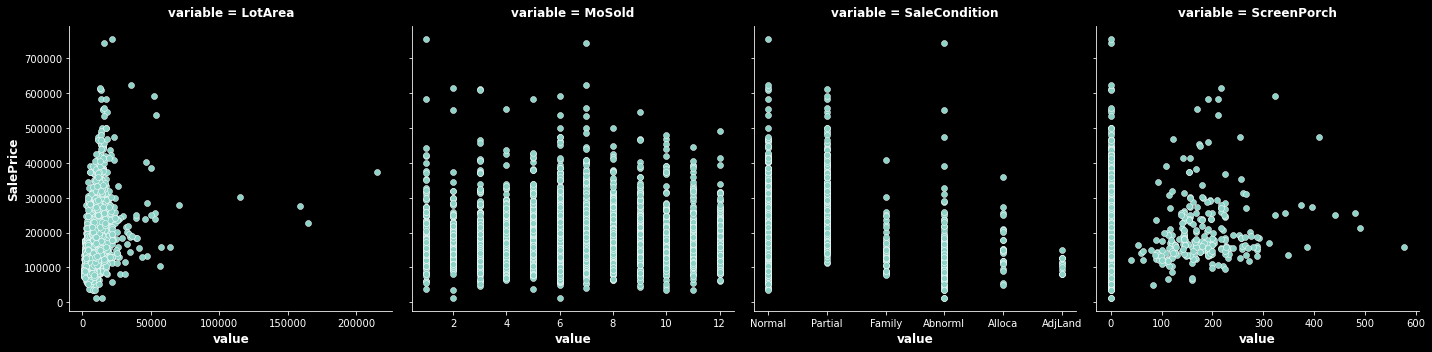

In [26]:
features = ["LotArea","MoSold","SaleCondition","ScreenPorch"]
sns.relplot(
x="value",y="SalePrice",col="variable",data = df.melt(id_vars="SalePrice",value_vars=features),facet_kws=dict(sharex=False),);

In [27]:
X = df.copy()
y = X.pop('SalePrice')

mutual_info_scores = mutual_info_scores(X, y)

In [36]:
mutual_info_scores.head(10)

OverallQual     0.578700
Neighborhood    0.556468
GrLivArea       0.493904
GarageArea      0.414343
YearBuilt       0.402562
GarageCars      0.398296
TotalBsmtSF     0.388701
FirstFlrSF      0.368483
BsmtQual        0.365384
KitchenQual     0.326059
Name: MI Scores, dtype: float64

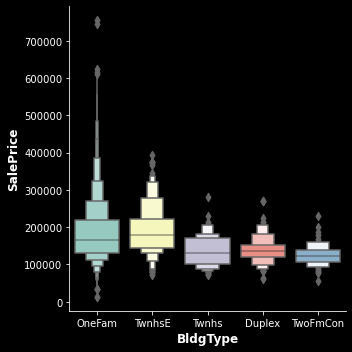

In [33]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen")